In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from plotnine.data import *
import re

In [84]:
cov = pd.read_csv("~/Downloads/us-counties-covid.csv")

In [85]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502832 entries, 0 to 2502831
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 114.6+ MB


In [86]:
cov.head(3)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0


In [87]:
cov.fips = cov.fips.apply(lambda x: str(x).split('.')[0])


In [88]:
cov['year'] = cov.date.apply(lambda x: str(x).split('-')[0])
cov['month'] = cov.date.apply(lambda x: str(x).split('-')[1])

In [89]:
cov_new = cov.drop(['date'], axis=1)

In [90]:
cov_new.head(3)

,county,state,fips,cases,deaths,year,month
0,Snohomish,Washington,53061,1,0.0,2020,01
1,Snohomish,Washington,53061,1,0.0,2020,01
2,Snohomish,Washington,53061,1,0.0,2020,01


In [91]:
cov_new = cov_new.groupby(['year', 'month', 'fips']).mean().reset_index()

In [92]:
cov_new.head(3)

,year,month,fips,cases,deaths
0,2020,01,17031,1.25,0.0
1,2020,01,4013,1.00,0.0
2,2020,01,53061,1.00,0.0


In [93]:
cov_new.shape

(85135, 5)

In [94]:
cov_new['ym'] = cov_new.year + cov_new.month

In [95]:
cov_new.head(3)

,year,month,fips,cases,deaths,ym
0,2020,01,17031,1.25,0.0,202001
1,2020,01,4013,1.00,0.0,202001
2,2020,01,53061,1.00,0.0,202001


In [96]:
cov_new[cov_new.fips.isna()]

,year,month,fips,cases,deaths,ym


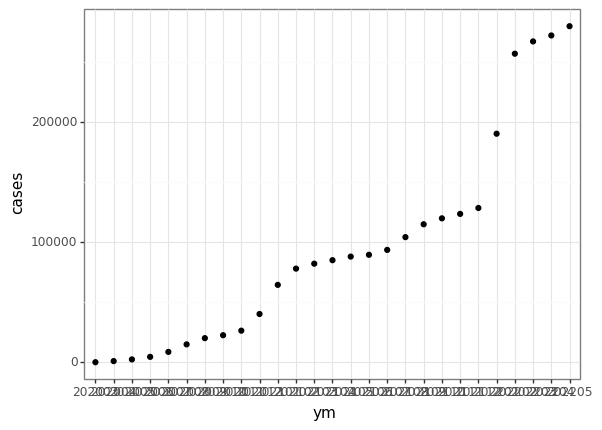

<ggplot: (8765141950681)>

In [97]:
(ggplot(cov_new[cov_new.fips == '6001'], aes(x='ym', y='cases')) + geom_point() + theme_bw() + theme(legend_position='none'))

In [98]:
cfips_list =  cov_new.fips.unique()
case_2019 = pd.DataFrame({'year': '', 'month': '', 'fips': '', 'cases': 0, 'deaths': 0, 'ym': ''}, index=[0])

In [99]:
cfips_list.sort()

# remove the nan value at the very end

cfips_list = cfips_list[:-1]


In [100]:
cfips_list

array(['10001', '10003', '10005', ..., '9011', '9013', '9015'],
      dtype=object)

In [101]:
for i in cfips_list:
    for j in range(1, 13):
        case_2019 = pd.concat(objs=[case_2019, pd.DataFrame({'year': '2019', 'month': '0' + str(j) if j < 10 else str(j), 'fips': '0' + str(i) if int(i) < 10000 else str(i), 'cases': 0, 'deaths': 0, 'ym': '2019' + '0' + str(j) if j < 10 else '2019' + str(j)}, index=[0])], axis=0)

In [102]:
case_2019.head(3)

,year,month,fips,cases,deaths,ym
0,,,,0,0,
0,2019,01,10001,0,0,201901
0,2019,02,10001,0,0,201902


In [103]:
i = 10001
j = 11
